# Predicting the Survival Status of Breast Cancer Patients

 “The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast Cancer.”
 
There are four variables in the dataset, including the dependent variable. We are going to use age, operation_year and axillary_nodes_count to build a classifier that can predict the likelihood of survival of less than five years or more than five years. 
 
The default dataset has two categories, 1 and 2 (1 = the patient survived 5 years or longer
2 = the patient died within 5 year) . We are going to change that into the form 0 and 1 for probability computation, 1 being the longer survival period. 

We have to first prepare the data for computation.


In [100]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [101]:
# importing the dataset as a pandas dataframe
df = pd.read_csv("haberman.csv", delimiter=",")

In [102]:
# printing the columns of the dataset
df.columns

Index(['Age', 'operation_year', 'axillary_nodes_count', 'survival_status'], dtype='object')

There are no missing data in the dataset, so there's no need to drop any row.

In [103]:
# we have to update the survival status to binary 0 and 1. Inorder to do this we will create dummy variables
pd.get_dummies(df.survival_status)

,1,2
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,0,1
8,0,1
9,1,0


In [104]:
# we are going to set the column survival_count with the new values

df["survival_status"] = pd.get_dummies(df.survival_status)[1]

In [105]:
#checking the dataframe
df.head(10)

,Age,operation_year,axillary_nodes_count,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


In [106]:
# the survival status is the dependent variable here
y = df["survival_status"]

In [107]:
# we need to drop the survival_status and operation_year from the dataframe
df.drop(["survival_status", "operation_year"], axis=1, inplace=True)

 **We have droped the operation_year because it's centered around 63 with an standard deviation of 3. Since most of the data point will lie between one standard deviation, the time span isn't significant enough to show any change in technology. In another test, the operation_year variable has shown to decrease the effectiveness of the model.** 

In [108]:
# the current dataframe
df.head(10)

,Age,axillary_nodes_count
0,30,1
1,30,3
2,30,0
3,31,2
4,31,4
5,33,10
6,33,0
7,34,0
8,34,9
9,34,30


**We won't be scaling the data for this model, because it's not required here.**


In [109]:
# we will create the training set and test case for comparison later
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, random_state=42)

We don't know how much good is good. So any dumb model can achieve high accuracy by just returing the most frequent occuring class in the y_test series. We will calculate the proportion of the most frequent class, and we will lable it null accuracy. 

In [110]:
# our class distribution
y_test.value_counts()    

1    55
0    22
Name: survival_status, dtype: int64

In [111]:
# Calculaing proportion of ones in the test set, since its clear from the above result 
# that ones are more than the zeroes.
y_test.mean()

0.7142857142857143

# Any model that returns all patient survived more than 5 years will be 71% correct.

In [112]:
# creating instance model for logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

In [113]:
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [114]:
# now we are going to fit our test data into the model
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print("Our accuracy score is {:.3f}".format(accuracy_score(y_test, y_pred)))

Our accuracy score is 0.727


# Our model doesn't look good compared to the nulll accuracy. So we need a better matrics to judge out model

We will be using a confusion matrix to understand the nature of errors we have committed. The confusion matrix is a table, here it's 2X2 in dimension, that tells about four things: True Negative (upper left), False Positive (upper right), False Negative ( lower left)  and True Positive ( lower right).  


In [115]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[ 5, 17],
       [ 4, 51]])

In [116]:
# we are going to isolate the confusion matrix
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# we are going to calculate the sensitivity and specificity using the above values

** Sensitivity measures how often a positive value gets classified as positive.**

** Specificity measures how often a negative value gets classified as negative.**

In [117]:
print("Sensitivity: ", TP / (TP + FN))


Sensitivity:  0.927272727273


In [118]:
print("Specificity: ", TN / (TN + FP))


Specificity:  0.227272727273


# We have to adjust the classifcation model

In [119]:
# we will view the the first 10 predictions for the model to know which probability belongs to which class
print(y_pred[0:10])
print(model.predict(X_test)[0:10])

[1 1 1 1 1 0 1 1 1 1]
[1 1 1 1 1 0 1 1 1 1]


In [120]:
# we are going to print the predicted probability of the model instance for overview
model.predict_proba(X_test)[0:10, :]

array([[ 0.21265053,  0.78734947],
       [ 0.19422699,  0.80577301],
       [ 0.2192878 ,  0.7807122 ],
       [ 0.20012736,  0.79987264],
       [ 0.18282461,  0.81717539],
       [ 0.7657807 ,  0.2342193 ],
       [ 0.20525744,  0.79474256],
       [ 0.21016478,  0.78983522],
       [ 0.40068576,  0.59931424],
       [ 0.2553626 ,  0.7446374 ]])

In [121]:
# we will store the predicted probabilities of class 1 in a separate object
y_pred_prob = model.predict_proba(X_test)[:, 1]


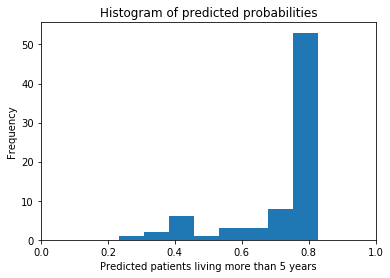

In [122]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted patients living more than 5 years')
plt.ylabel('Frequency')

We definitly see a negative skewness which explains the high sensitivity in the model

In [123]:
# We have to increase the threshold inorder to decrease the sensitivity
from sklearn.preprocessing import binarize
y_pred = binarize([y_pred_prob], 0.76)[0]

In [124]:
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[10, 12],
       [14, 41]])

In [125]:
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [126]:
print("Sensitivity: ", TP / (TP + FN))
print("Specificity: ", TN / (TN + FP))


Sensitivity:  0.745454545455
Specificity:  0.454545454545


# We have improved the specificity of the model, thus reducing false positives. We will use AUC to confirm that out model is indeed better than random selection. 

In [127]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_prob))

0.642148760331


**An AUC above 0.50 proves that the model is better than random chance.** 

We can use the ROC curve to better judge a threshold for an optimum value, and you can checkout the resource below for futher details.

# Other Resources

Kevin Markham has put up an excellent example of logictic regression, which is very detailed, and I have used his work as a reference. 

Link to his work below:

https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb